In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats #library khusus untuk analysis statistik 
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# menentukan rataan 2 kelompok
# grup 1 = tanpa pupuk
# grup 2 = dengan pupuk
rataan1 = 50 
rataan2 = 65

# menentukan standar deviasi (variasi) -- sama untuk 2 kelompok
sd = 5

# ukuran sample 2 kelompok
sample1 = 50
sample2 = 40

In [3]:
# generate bilangan random
test = np.random.randn(sample1)
test

array([-1.36420837, -0.03460571, -0.0279073 ,  1.74704813,  0.89821094,
        0.35383279,  0.4843816 ,  1.290128  , -1.04187789, -0.89386297,
        0.79517006,  1.20980909, -0.14547705, -0.93301768,  1.70901264,
        0.6987804 , -0.61298281,  1.0427043 , -0.08115773, -0.05270933,
        2.21660451,  0.17705856,  0.43127452, -0.8603148 ,  0.4865811 ,
        0.50876641,  0.68998118, -0.222157  , -0.11556899, -1.23080702,
        0.01906754, -0.95110688, -0.19775302,  0.85206528, -0.23144474,
        0.13638409, -1.41596313,  0.25268031,  1.40420738, -0.18452777,
       -1.29117369, -1.166417  ,  0.87743157, -0.40618552, -0.24717903,
        0.46627387, -0.38172452,  0.75411988,  0.76281042,  0.92774225])

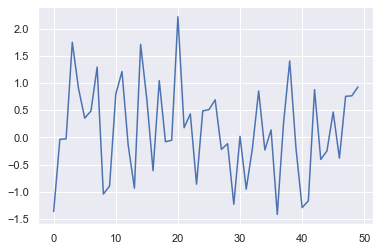

In [4]:
plt.plot(test);

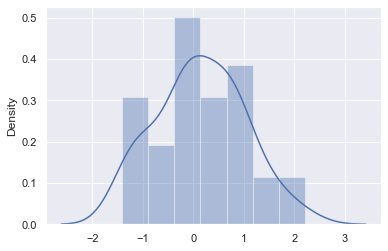

In [5]:
sns.distplot(test);

In [6]:
# generate data
data1 = np.random.randn(sample1)*sd + rataan1
data2 = np.random.randn(sample2)*sd + rataan2

# Menggabungkan sample size (Jumlah Data)
kelompok_data = [sample1, sample2]

batas = [np.min(np.hstack((data1,data2))), np.max(np.hstack((data1,data2)))]

In [7]:
batas

[40.89155103497474, 73.19030497538895]

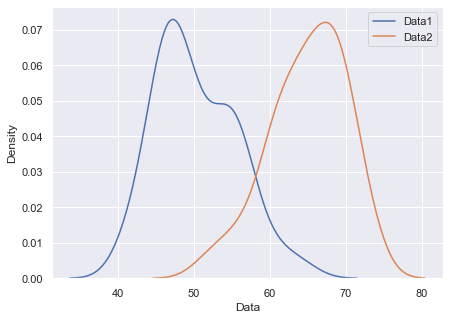

In [8]:
# plot distribusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist=False, label='Data1')
a = sns.distplot(data2, hist=False, label='Data2')

a.set(xlabel='Data', ylabel='Density')
plt.legend();

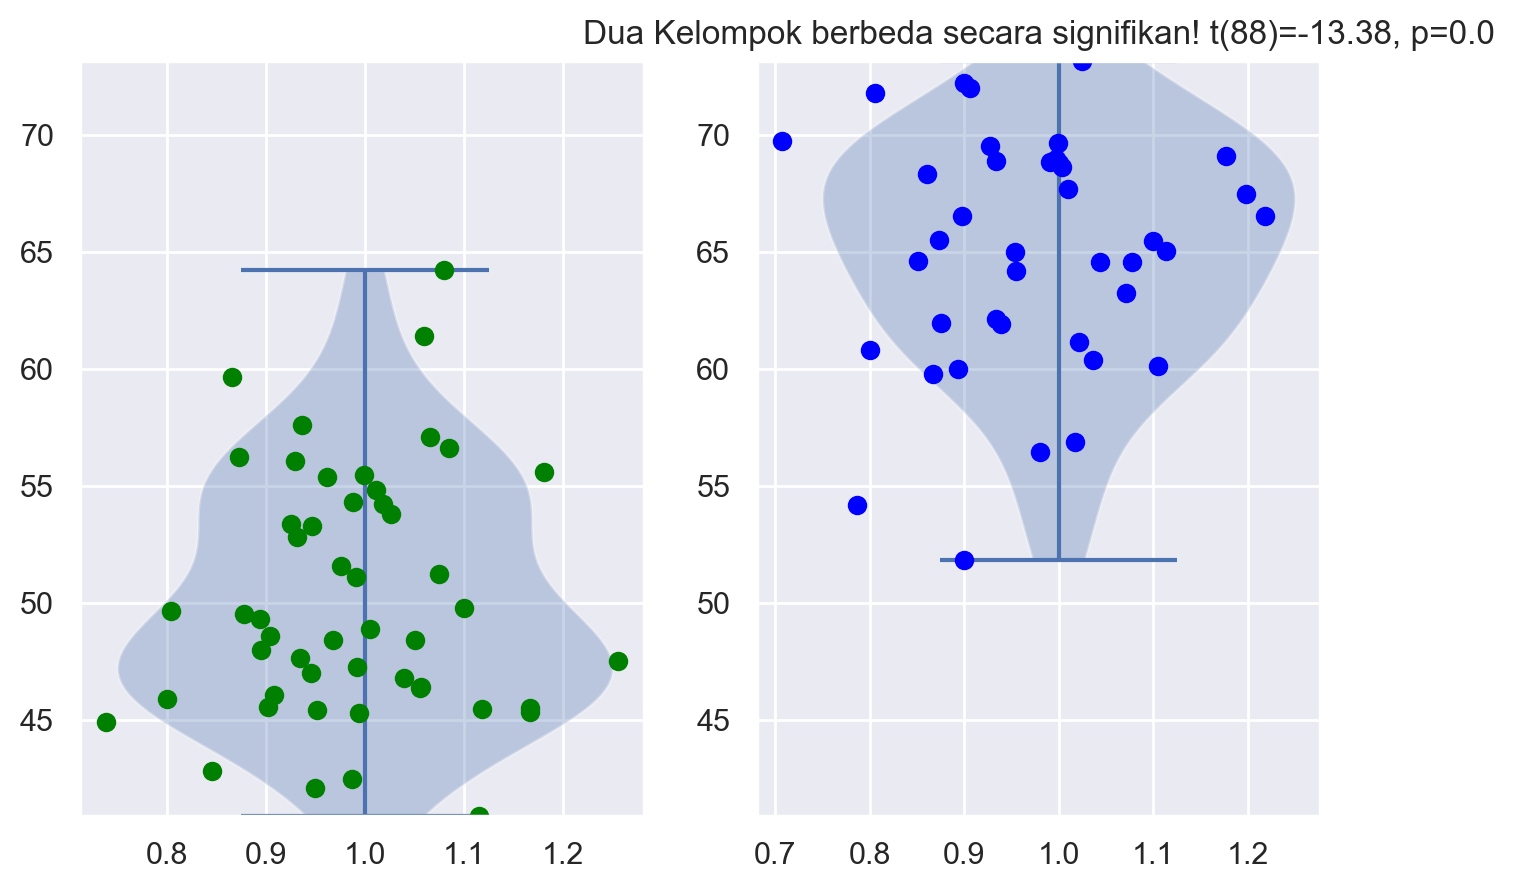

In [9]:
# melakukan uji statistik (statistik inferensial)
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=200)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sample1)/10, data1, 'o', color='green')
ax[0].set_ylim(batas)

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sample2)/10, data2, 'o', color='blue')
ax[1].set_ylim(batas)

# melakukan uji t-test
t, p = stats.ttest_ind(data1, data2)

# mencetak hasil t-test di judul
sigtxt = ('', 'TIDAK')
plt.title('Dua Kelompok{} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>.05)],
                                                                             sum(kelompok_data)-2,
                                                                             np.round(t,2),
                                                                             np.round(p,6)))
plt.show()

In [10]:
p

6.38402333768271e-23